##DECISION TREE

A decision tree is a non parametric supervised Machine learning algorithm that is used for both classification and regression problems. It is mostly used for classification tasks. The goal is to build a model to predict the value of the target label  by using simple decision rules inferred from data.

<img src="https://imgur.com/IccCCME.png" title="source: decision tree"/>

##IMPORTANT TERMINOLOGIES :

**ROOT NODE :** Root node is where the population data is present before any split. It represents the entire population or sample which further gets divided into sub-nodes.The orange color node at the top of the tree represents the root node.

**Decision Nodes :** When a sub-node gets divided further into different sub-nodes it is known as decision node. The nodes in red color represent the decision nodes as they are further getting divided into different sub-nodes.

**Leaf / Terminal Node :** The node which does not get divided further is known as leaf / terminal node. The nodes in green color represents the terminal nodes.

**Depth :** The depth of the tree is the longest path from the root node to the leaf of the tree. The depth of the tree is 3 here as we have to take 3 steps to reach from the root node to the last terminal / leaf node.

**Splitting :** The process of dividing a node further into sub-nodes is known as splitting.

**Pruning :** It is the opposite of splitting. When a decision tree is fully grown we remove the sub-nodes from the decision node and this process is known as pruning.

---





##ADVANTAGES OF DECISION TREE :
* Decision trees are simple to interpret and visualize.
* Requires less effort for data preparation compared to other algorithms.
* Useful in data exploration. Decision trees are one of the fastest ways to identify the most significant variables.
* A decision tree can handle both categorical and numerical variables.
* A decision tree can handle missing values. 


##DISADVANTAGES OF DECISION TREE :
* Decision trees are very prone to overfitting.
* A small change in data can cause a large change in the structure of the decision tree.
* Decision trees are relatively expensive as complexity and time taken is more.


##DECIDING BEST SPLIT :

A decision tree uses multiple algorithms to decide to split a node into different sub-nodes. The sub-nodes are more homogeneous than the previous nodes with respect to the target variable. As we go on splitting the nodes the purity of the nodes increases.

A decision tree splits the nodes on all the available variables and selects the one which results in most homogeneous sub-nodes. The process is repeated until a full grown tree is formed.

The algorithm selection for split is dependent on the type of target variable. Here we will only look into the categorical target variables and different algorithms that are there to decide the split.

---




## GINI IMPURITY

                            Gini Impurity = 1- Gini
                            Gini = p^2 + q^2

The goal of learning algorithms in decision tree is always to find the best split for each node of the tree.

Gini Impurity measures the disorder of a set of elements. To understand it better consider a example. Suppose we have data about students in a class and we want to find out who is most likely to pass or fail.



Suppose we have information about students whether they attend tution or not and they participate in co-curricular activities or not as two features and we want to predict if the students is going to fail or pass based on these 2 features. 

      | FEATURES |
      --- | 
      | ATTEND TUTION |
      | CO-CURRICULAR ACTIVITIES | 


| TOTAL STUDENTS | 20|
--- | ---|
| PASS | 12 |
| FAIL | 8 |

First we will calculate the gini impurity for both the split and select the one with less impurity.

**Let's first consider the split on tution**

<img src = 'https://imgur.com/lDkDTsu.png'>

We have total 20 students in root node. Where star represents failed students and the spehere represents passed students.

We will represent Probability of pass by p and probability of fail with q

Out of 20, 12 of them pass and 8 fail. So at root node we have  p = 20/12 which equals 0.6 and q = 8/20 which equals 0.4

If we calculate Gini at root node we will have p^2 + q^2 = 0.6^2 + 0.4^2 which equals  0.52.

*Impurity = 1 - Gini*

Impurity = 1 - 0.52 = 0.48

                      So at the root node we have impurity = 0.48. 


We have split the node based on tution, where tution = 1 represent students attend tutuions and tution = 0 represents students didn't attend tutuion.

**After the split we have 12 values in left node and 8 values in right node**

    For the left sub-node. Tution = 1, we have total 12 students. Out of those 12, 9 pass and 3 fail.
    
                    p = 9/12 which equals  0.75 
                    q = 3/12 which equals 0.25
                    p^2 + q^2 = 0.75^2 + 0.25^2 = 0.625

                    Gini Impurity = 1 - Gini
                                  = 1 - 0.625 = 0.37
                

    For the right sub-node. Tution = 0, we have total 8 students. 3 Pass and 9 Fail
    
                    p = 3/9 which equals  0.38 
                    q = 5/9 which equals 0.62
                    p^2 + q^2 = 0.38^2 + 0.62^2 = 0.53

                    Gini Impurity = 1 - Gini
                                  = 1 - 0.53 = 0.47
                

    Now we will calculate the weighted impurity for the split on tution.

    Weighted Node impurity = ( (Total number of values in left child node / Total values in parent node) *  Gini Impurity of left node) +
                            ( (Total number of values in right child node / Total values in parent node) *  Gini Impurity of right node )

                            Weighted Impurity = 12/20 (0.37) + 9/20 (0.47) = 0.41
                          



In parent node the gini impurity was 0.48 and now after the split the gini impurity is 0.41. That means we have more homogeneous group and split was significant.

**Similarly We will calculate the split on Co-curricular activities** 

We will leave the calculation part for you. calculate the weighted impurity for the split on the co-curricular activities. For simplicity round off the values.

Here's what you will get after all the calculations.

<img src = "https://imgur.com/5jk0AyN.png" height="350" width = "800" align="center">

---






    We can see that the gini impurity is less when the split is done on Tutions so we select tution as our 1st split. 

We will again repeat the same steps and select the feature with less impurity for further splitting.

### We will use Titanic dataset for the demo. 

In [0]:
#import all the necessary package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import minmax_scale, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

In [0]:
#read data
df = pd.read_csv('/content/drive/My Drive/data_set/titanic.csv')

In [3]:
#check head 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#check the shape
df.shape

(891, 12)

In [0]:
#drop the PassengerId and Ticket
df.drop(['PassengerId','Ticket'],axis=1, inplace=True)

In [6]:
#check the information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [7]:
#check the null values 
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [0]:
# We see that the cabin has most null values out of 891 177 are null values i.e almost 77% so we drop this feature as well.

# drop cabin column
df.drop('Cabin',axis=1,inplace=True) 

In [0]:
# extract the title from the name
df['Title']=0
df['Title']=df.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
df['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col',
                         'Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [10]:
#check the mean age by title
df.groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [0]:
#fill the missing values with the mean of the salutations
df.loc[(df.Age.isnull())&(df.Title=='Mr'),'Age']= df.Age[df.Title=="Mr"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Mrs'),'Age']= df.Age[df.Title=="Mrs"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Master'),'Age']= df.Age[df.Title=="Master"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Miss'),'Age']= df.Age[df.Title=="Miss"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Other'),'Age']= df.Age[df.Title=="Other"].mean()

#drop name
df = df.drop('Name', axis=1)

In [0]:
#fillna with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0])

In [0]:
#Feature transformation, encode the categorical variables
df['Sex'] = df['Sex'].map({'female' : 1,'male' : 0}).astype(int)
df['Embarked'] = df['Embarked'].map({'Q' : 0,'S':1, 'C':2}).astype(int)
df['Title'] = df['Title'].map({'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 'Other':4})

In [0]:
Y = df['Survived']
X = df.drop('Survived',axis=1)

In [0]:
#split into train and test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.25,random_state=42)

**The defualt criteria for splitting in sklearn is Gini**

In [16]:
DecisionTreeClassifier()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

There are many parameters that we can tune here. We will look at each parameter later.

In [0]:
#build decision tree model with max depth b/w 1 and 6 inclusive.

train_accuracy = []
test_accuracy = []

for i in np.linspace(1,6,6):
  tree = DecisionTreeClassifier(max_depth=i,random_state=42)
  tree.fit(X_train,Y_train)
  train_predict = tree.predict(X_train)
  train_accuracy.append(accuracy_score(Y_train,train_predict))

  test_predict = tree.predict(X_test)
  test_accuracy.append(accuracy_score(Y_test,test_predict))

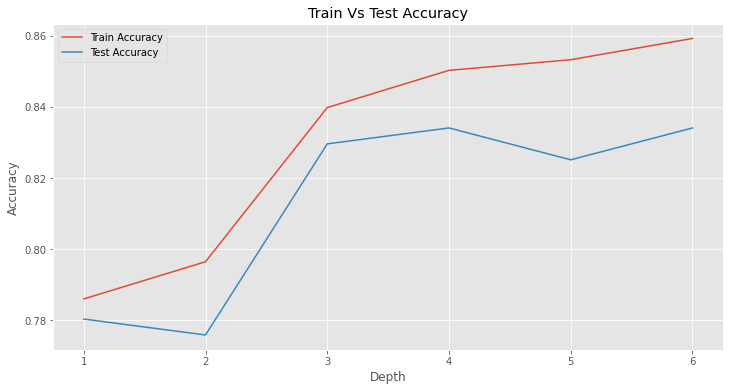

In [18]:
#plot train and test accuracy
plt.figure(figsize=(12,6))
plt.plot(np.linspace(1,6,6),train_accuracy,label='Train Accuracy')
plt.plot(np.linspace(1,6,6),test_accuracy,label='Test Accuracy')
plt.title('Train Vs Test Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
#run a decision tree with max_depth = 3
clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)
clf.fit(X_train,Y_train)
predict = clf.predict(X_test)
accuracy_score(Y_test,predict)

0.8295964125560538

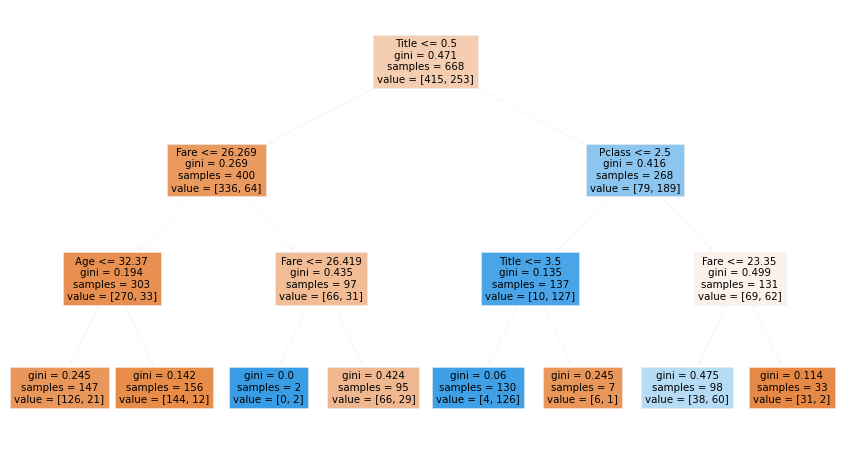

In [20]:
#plot the tree
from sklearn import tree
plt.figure(figsize=(15,8))
tree.plot_tree(clf, feature_names=X.columns.to_list(), filled=True)
plt.show()

As we know high gini values means the less impurity. Here title feature has the maximum gini values and hence it is chosen as the first split. As we are going down the tree the gini is decresing.

We can also check the feature importance of the variables in building the decision tree.

    feature  importance
7     Title       0.669
0    Pclass       0.177
5      Fare       0.150
2       Age       0.004
1       Sex       0.000
3     SibSp       0.000
4     Parch       0.000
6  Embarked       0.000


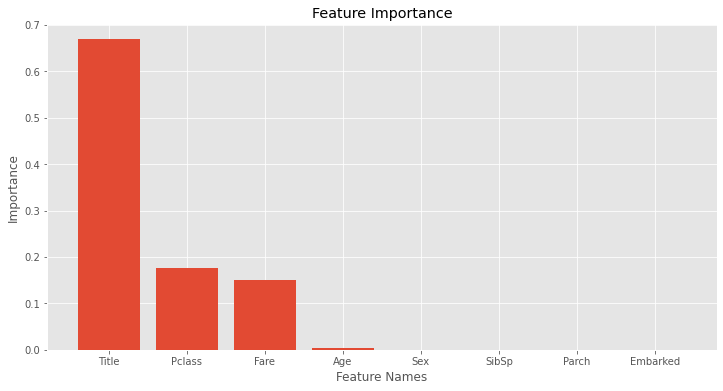

In [30]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
print(importances)

#plot bar graph for feature importances
plt.figure(figsize=(12,6))
plt.bar(importances['feature'],importances['importance'],align = "center")
plt.title('Feature Importance')
plt.xlabel('Feature Names')
plt.ylabel('Importance')
plt.show()

As we sac see from the graph title play a very important role in building our model to preddict whether the person is going to survive or die. 

Using this functionality we can also select the features for building our mode.From graph we can see that the features Sex, SibSp, parch, Embarked doesn't add any value in deciding whether the person is going to die or survive so we can remove those features while building our model.